In [1]:
%matplotlib notebook
%pylab
#%run file.ipynb #calling functions

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from cg_functions import *

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
# user defined parameters
u = 2   # velocity
Tf = 0.025  # final time
ax = -1; 
bx = 1
sigma = 1/8
#qinit = lambda x: np.exp(-(x/(2*sigma))**2)
qinit = lambda x : sin(2*pi*x)

def bc(t):
    return qinit(ax-u*t), qinit(bx-u*t)
    

# function f(q(x,t)) = u*q(x,t)

fe = lambda q: u*q
a = 0.1

In [8]:
# Order of polynomials

Order = [1,2,3,4, 6, 8]
P = []

# list of the number of elements
NE = array([20,40,80,160])
l = len(NE)

error_list = []

for N in Order:     
    Q = N+1    
    
    xe2 = array(Lobatto_p(N))  # Lobatto point mesh
    xe = xe2[::-1]

    # array that contains the error for each iteration
    Error = zeros(l)
    for ne in range(l):

        Ne = NE[ne]
        Np = N*Ne+1

        # space stuff
        #x = np.linspace(-1, 1, Np)

        x = zeros(Np)
        xel = linspace(-1,1,Ne+1)  # Element mesh
        for e in range(1,Ne+1):
            ae=xel[e-1] ; be=xel[e]

            xsi=((be-ae)/2)*(xe-1) + be
            #print('a=',a)
            #print('b=',b)
            #print('xsi=',xsi)
            for i in range(0,N+1):
                ip=intma(e,N)[i]
                #print('ip=',ip)
                x[ip]=xsi[i]
        #x = np.linspace(-1, 1, Np)

        dx = (bx-ax)/(Np-1)   # Average distance between the points

        #time stuff

        fixed_dt = True
        if (fixed_dt):
            dx0 = (bx-ax)/(NE[0]*N)
            dtest = a*dx0/np.abs(u)
            M0 = int(Tf//dtest)+1    # Number of time steps
            dt0 = Tf/M0

            f = log2(dx0/dx)
            dt = dt0/2**f
            M = int(M0*2**f)
        else:        
            dtest = a*dx/np.abs(u)
            M = int(Tf//dtest)+1    # Number of time steps
            dt = Tf/M

        print('N = {:d}, time_step(M = {:d})'.format(N,M))

        t = linspace(0, Tf, M+1)

        # approximate solution of the wave equation
        q = Solver_1DW(N,Ne,M,Q,qinit,fe,bc,ax,bx,x,t,dt)

        # exact solution
        q_exact = qinit(x-u*t[M])
        #error
        error = abs(q-q_exact)
        Error[ne] = max(error)
        
    error_list.append((N,Error))
    
        #error = sqrt(sum((q-q_exact)**2)/sum(q_exact**2))
        #Error[ne] = error
        #plot of the computed and exact solutions

        #figure(ne)
        #plot(x, q, label = 'Computed: Ne = {}'.format(Ne))
        #plot(x, q_exact, '--', label = 'Exact: N = {}, Ne = {}'.format(N,Ne))

        #xlabel('NE')
        #ylabel('q')
        #legend()
        #grid() 


N = 1, time_step(M = 5)
N = 1, time_step(M = 10)
N = 1, time_step(M = 20)
N = 1, time_step(M = 40)
N = 2, time_step(M = 10)
N = 2, time_step(M = 20)
N = 2, time_step(M = 40)
N = 2, time_step(M = 80)
N = 3, time_step(M = 15)
N = 3, time_step(M = 30)
N = 3, time_step(M = 60)
N = 3, time_step(M = 120)
N = 4, time_step(M = 20)
N = 4, time_step(M = 40)
N = 4, time_step(M = 80)
N = 4, time_step(M = 160)
N = 6, time_step(M = 30)
N = 6, time_step(M = 60)
N = 6, time_step(M = 120)
N = 6, time_step(M = 240)
N = 8, time_step(M = 40)
N = 8, time_step(M = 80)
N = 8, time_step(M = 160)
N = 8, time_step(M = 320)


## Plot error vs. number of elements (NE)

<IPython.core.display.Javascript object>


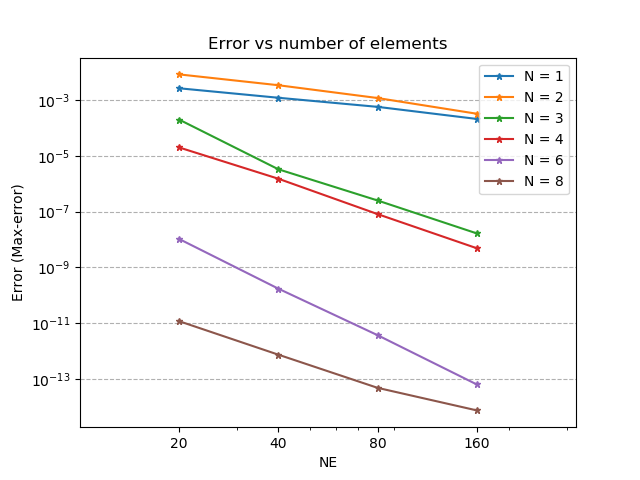

In [9]:
import cg_graphics

figure(1)
clf()
    
for e in error_list:
    N = e[0]
    Error = e[1]        
    loglog(NE, Error,'-*',markersize=5, label = 'N = {}'.format(N))

xlabel('NE')
ylabel('Error (Max-error)')
title('Error vs number of elements')
cg_graphics.set_xticks(NE)  # Create nice tick marks for NE
legend()
grid(axis='y',linestyle='--')
show()

## Plot error vs. degrees of freedom (DOF)

<IPython.core.display.Javascript object>


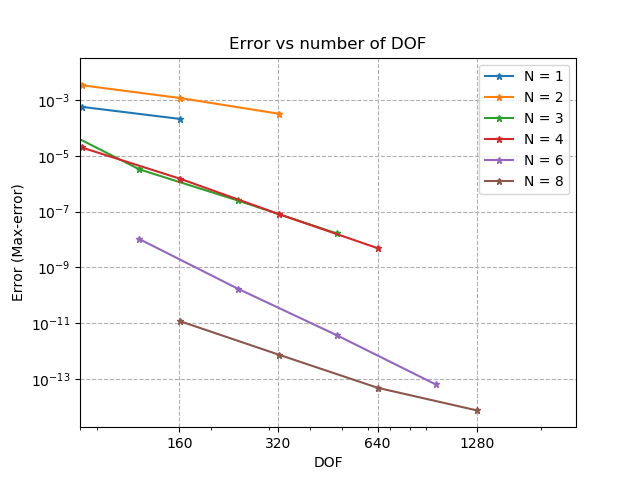

In [10]:
import cg_graphics
figure(2)
clf()
    
for e in error_list:
    N = e[0]
    Error = e[1]
    
    Np = NE*N+1
    loglog(Np, Error,'-*',markersize=5, label = 'N = {}'.format(N))
    
    p = polyfit(log(NE), log(Error),1)
    #print('N = {:d}, rate = {:f}'.format(N,p[0]))
    P.append(p[0])

xlabel('DOF')
ylabel('Error (Max-error)')
title('Error vs number of DOF')
cg_graphics.set_xticks(NE*N)  # Create nice tick marks for NE
grid(axis='both',linestyle='--')
legend()
show()    

## Convergence Rates

In [11]:
for i in range(len(Order)):
    print('N = {:d}, rate = {:f}'.format(Order[i],P[i]))

N = 1, rate = -1.202800
N = 2, rate = -1.557135
N = 3, rate = -4.433545
N = 4, rate = -4.018341
N = 6, rate = -5.746444
N = 8, rate = -3.579045
